<a href="https://colab.research.google.com/github/flor-g/VP-dependency-in-sluices/blob/main/stimuli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk


In [ ]:
import nltk  # Import the Natural Language Toolkit library

In [ ]:
class stimuli:
  '''
  assembles input into sentences.

  Attributes:
    V: str, verb
    P: str, preposition
    dependency: int, 0 means no dependency, 1 means one-way dependence, 2 means mutual dependence.
    prefix: list, ['subject', 'determiner', 'object', 'things after the comma']
    wh_phrase: str, e.g. which, what, who
    suffix: str, to be aseembled into the part after wh-phrase
    el_spot: str, either 'obj' or 'sub'
  '''
  def __init__ (self, V, P,dependency, prefix, wh_phrase, suffix, ptest='does something', el_spot='obj', assmbld_prefix=None, assmbld_wh_phrase=None, assmbld_suffix=None):
      # initializes the class with provided input
      self.V=V
      self.P=P
      self.dependency=dependency
      self.prefix=prefix
      self.wh_phrase=wh_phrase
      self.suffix=suffix
      self.ptest=ptest
      self.el_spot=el_spot

      # input validation:
      if type(prefix)!= list:
          raise TypeError('prefix must be a list!')

      elif type(V or P or prefix[0] or prefix[1] or prefix[2] or prefix[3] or wh_phrase or suffix)!= str:
          raise TypeError('variable must be string!')

      elif type(dependency)!= int or dependency>3:
          raise TypeError('!format of dependency value incorrect. enter value 0, 1, 2, or 3!')

      else:
      # cleans up the input and assembles sentence components:
          V.strip()
          P.strip()
          wh_phrase.strip()
          suffix.strip()

          for ele in prefix:
              ele.strip()
          if prefix[1] == '':
              self.assmbld_prefix= prefix[0] + ' ' + V + ' ' + P + ' ' + prefix[2] + ', ' + prefix[3]
          elif prefix[2] == '':
              self.assmbld_prefix= prefix[0] + ' ' + V + ' ' + P + ' ' + prefix[1] + ', ' + prefix[3]
          else:
            if el_spot=='obj':
              self.assmbld_prefix= prefix[0] + ' ' + V + ' ' + P + ' ' + prefix[1] + ' ' + prefix[2] + ', ' + prefix[3]
            elif el_spot=='sub':
              self.assmbld_prefix= prefix[1] + ' ' + prefix[1] + ' ' + V + ' ' + P + ' ' + prefix[2] + ', ' + prefix[3]
          if wh_phrase=='which' or wh_phrase=='what' and prefix[2]!='':
            if el_spot=='obj':
              self.assmbld_wh_phrase= wh_phrase + ' '+ prefix[2]
            elif el_spot=='sub':
              self.assmbld_wh_phrase= wh_phrase + ' '+ prefix[0]


          else:
            self.assmbld_wh_phrase= wh_phrase

          if el_spot=='obj':
            self.assmbld_suffix= suffix + ' ' + V
          elif el_spot=='sub':
            self.assmbld_suffix= V + ' ' + suffix

  def info(self):
  # Returns a dictionary containing the input information for the stimulus.
      info={'V':self.V,
            'P':self.P,
            'dep':self.dependency,
            'prefix':self.prefix,
            'wh-phrs':self.wh_phrase,
            'suffix':self.suffix,
            'ellipsis spot': self.el_spot
            }
      return info

  def format_a(self):
  # creates stimulus with ellipsis and without pied piping
      sentence= self.assmbld_prefix + ' ' + self.assmbld_wh_phrase + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence

  def format_b(self):
  # creates stimulus with both ellipsis and pied piping
      sentence= self.assmbld_prefix + ' ' + self.P + ' ' + self.assmbld_wh_phrase + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence

  def format_c(self):
  # creates stimulus with neither ellipsis nor pied-piping
      sentence= self.assmbld_prefix + ' ' + self.assmbld_wh_phrase + ' ' + self.assmbld_suffix + ' ' + self.P + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence

  def format_d(self):
  # creates stimulus without ellipsis and with pied-piping
      sentence= self.assmbld_prefix + ' ' + self.P + ' ' + self.assmbld_wh_phrase + ' ' + self.assmbld_suffix + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence

  def v_test(self):
      sentence= self.prefix[0] + ' ' + self.V + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence

  def p_test(self):
      sentence= self.prefix[0] + ' ' + self.ptest +' ' + self.P + ' ' + self.prefix[1] + ' ' + self.prefix[2] + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence
  def norm(self):
      sentence= self.prefix[0] + ' ' + self.V + ' ' + self.P + ' ' + self.prefix[1] + ' ' + self.prefix[2] + '.'
      sentence= sentence[0].upper() + sentence[1:]
      return sentence
  def index(self):
    index=str(self.dependency)+self.V+self.P
    return index
def dict(stim, Dict):
# compiles the stimuli input and output into a dictionary
    Dict[stim.index()]=stim

def print_sentences(stim):
# prints out the stimuli output
    print(stim.format_a())
    print(stim.format_b())
    print(stim.format_c())
    print(stim.format_d())

Dict={}  # Main dictionary to store all stimuli

In [ ]:
stim_001=stimuli(V='cooked', P='with', dependency=0, prefix=['John','some','ingredient',"but he wouldn't reveal"], wh_phrase='which', suffix='he', ptest='did something')
dict(stim_001, Dict)
print_sentences(stim_001)

stim_002=stimuli(V='crashed', P='with', dependency=0, prefix=['the girl', 'someone when chasing her dog', '', "but she didn't remember"], wh_phrase='who', suffix='she', ptest='experienced something')
print('stim_002: ')
print_sentences(stim_002)
dict(stim_002,Dict)

stim_003=stimuli(V='appear', P='after', dependency=0, prefix=['the first flowers', 'some', 'holiday', 'and the shepherd may tell you'], wh_phrase='what', suffix='they', ptest='take place')
print('stim_003: ')
print_sentences(stim_003)
dict(stim_003,Dict)

stim_004=stimuli(V='talked', P='in', dependency=0, prefix=['the father', 'a', 'chapel', 'but I will keep to myself'], wh_phrase='which', suffix='he', ptest='did something')
print('stim_004: ')
print_sentences(stim_004)
dict(stim_004,Dict)

stim_005=stimuli(V='raged', P='in', dependency=0, prefix=['evil spirits', 'someone', '', 'and George knew'], wh_phrase='who', suffix='they', ptest='did something')
print('stim_005: ')
print_sentences(stim_005)
dict(stim_005,Dict)

stim_006=stimuli(V='fought', P='with', dependency=0, prefix=['our master', 'an', 'animal', 'and we all heard'], wh_phrase='what', suffix='he', ptest='did something')
print('stim_006: ')
print_sentences(stim_006)
dict(stim_006,Dict)

stim_007=stimuli(V='sang', P='with', dependency=0, prefix=['the poet', "someone", '', 'but I forgot'], wh_phrase='who', suffix='she', ptest='did something')
print('stim_007: ')
print_sentences(stim_007)
dict(stim_007,Dict)

stim_008=stimuli(V='gathered', P='about', dependency=0, prefix=['the peasants', 'someone', '', 'and the bishop saw'], wh_phrase='who', suffix='they', ptest='did something')
print('stim_008: ')
print_sentences(stim_008)
dict(stim_008,Dict)

stim_009=stimuli(V='circle', P='about', dependency=0, prefix=['many birds', 'a', 'house', "but the villagers wouldn't say"], wh_phrase='which', suffix='they', ptest='do something')
print('stim_009:')
print_sentences(stim_009)
dict(stim_009,Dict)

stim_010=stimuli(V='mill', P='about', dependency=0, prefix=['the sheep', 'something', '', 'and the shepherd might '], wh_phrase='what', suffix='they', ptest='do something')
print('stim_010')
print_sentences(stim_010)
dict(stim_010,Dict)

stim_011=stimuli(V='spun', P='about', dependency=0, prefix=['the dancers', 'an', 'object', "but I couldn't see"], wh_phrase='what', suffix='it', ptest='did something')
print('stim_011')
print_sentences(stim_011)
dict(stim_011,Dict)

stim_012=stimuli(V='proceeded', P='after', dependency=0, prefix=['the dead', 'something', '', "but we can't imagine"], wh_phrase='what', suffix='they', ptest='did something')
print('stim_012: ')
print_sentences(stim_012)
dict(stim_012,Dict)

stim_013=stimuli(V='march', P='after', dependency=0, prefix=['lambs', 'someone', '', 'but we need not mention'], wh_phrase='who', suffix='they', ptest='do something')
print('stim_013: ')
print_sentences(stim_013)
dict(stim_013,Dict)

stim_014=stimuli(V='fall', P='after', dependency=0, prefix=['leaves in the village', 'a certain', 'season', 'but outsiders can never predict'], wh_phrase='which', suffix='they', ptest='do something')
print('stim_014: ')
print_sentences(stim_014)
dict(stim_014,Dict)

stim_015=stimuli(V='lived', P='in', dependency=0, prefix=['spring once', 'something', '', 'but only the birds remember'], wh_phrase='what', suffix='it', ptest='took place')
print('stim_015: ')
print_sentences(stim_015)
dict(stim_015,Dict)

stim_016=stimuli(V='grow', P='in', dependency=0, prefix=['roses still', 'some', 'nearby land', 'and the dogs can smell'], wh_phrase='what', suffix='they', ptest='do something')
print('stim_016: ')
print_sentences(stim_016)
dict(stim_016,Dict)


John cooked with some ingredient, but he wouldn't reveal which ingredient.
John cooked with some ingredient, but he wouldn't reveal with which ingredient.
John cooked with some ingredient, but he wouldn't reveal which ingredient he cooked with.
John cooked with some ingredient, but he wouldn't reveal with which ingredient he cooked.
stim_002: 
The girl crashed with someone when chasing her dog, but she didn't remember who.
The girl crashed with someone when chasing her dog, but she didn't remember with who.
The girl crashed with someone when chasing her dog, but she didn't remember who she crashed with.
The girl crashed with someone when chasing her dog, but she didn't remember with who she crashed.
stim_003: 
The first flowers appear after some holiday, and the shepherd may tell you what holiday.
The first flowers appear after some holiday, and the shepherd may tell you after what holiday.
The first flowers appear after some holiday, and the shepherd may tell you what holiday they app

In [ ]:
stim_101=stimuli(V='wondered', P='about', dependency=1, prefix=['the philosopher', 'a', 'paradox', "but we never realised"], wh_phrase='what', suffix='she', ptest='did something') #V
print('stim_101: ')
print_sentences(stim_101)
dict(stim_101,Dict)

stim_102=stimuli(V='worries', P='about', dependency=1, prefix=["George's ghost", 'someone', '', 'and the village will never forget'], wh_phrase='who', suffix='it') #V
print('stim_102: ')
print_sentences(stim_102)
dict(stim_102,Dict)

stim_103=stimuli(V='stresses', P='about', dependency=1, prefix=['our master', 'something', '', 'and you might guess'], wh_phrase='what', suffix='he') #V
print('stim_103: ')
print_sentences(stim_103)
dict(stim_103,Dict)

stim_104=stimuli(V='fought', P='about', dependency=3, prefix=['the bishops', 'an', 'event', 'and surely you heard'], wh_phrase='which', suffix='he', ptest='did something') #P
print('stim_104: ')
print_sentences(stim_104)
dict(stim_104,Dict)

stim_105=stimuli(V='stayed', P='with', dependency=3, prefix=['the girl', 'a', 'villager', 'and John will tell you'], wh_phrase='which', suffix='she', ptest='did something') #P
print('stim_105: ')
print_sentences(stim_105)
dict(stim_105,Dict)

stim_106=stimuli(V='follows', P='after', dependency=3, prefix=['every lamb', "something", '', "but George had never known"], wh_phrase='what', suffix='the lamb') #P
print('stim_106: ')
print_sentences(stim_106)
dict(stim_106,Dict)

stim_107=stimuli(V='cleans', P='after', dependency=1, prefix=['the father', 'a', 'sin', 'and every lamb understands'], wh_phrase='what', suffix='he') #V
print('stim_107: ')
print_sentences(stim_107)
dict(stim_107,Dict)

stim_108=stimuli(V='believe', P='in', dependency=1, prefix=['the lambs', 'a', 'common destiny', 'and the father determines'], wh_phrase='which', suffix='they', ptest='do something') #V
print('stim_108: ')
print_sentences(stim_108)
dict(stim_108,Dict)

stim_109=stimuli(V='confessed', P='in', dependency=1, prefix=['John', 'someone', '', 'but we have no idea'], wh_phrase='who', suffix='he', ptest='did something') #V
print('stim_109: ')
print_sentences(stim_109)
dict(stim_109,Dict)

stim_110=stimuli(V='engaged', P='in', dependency=3, prefix=['George', 'something', '', 'and the villagers all witnessed'], wh_phrase='what', suffix='he', ptest='did something') #P
print('stim_110: ')
print_sentences(stim_110)
dict(stim_110,Dict)

stim_111=stimuli(V='has invested', P='in', dependency=1, prefix=['the merchant', 'some', 'trade', "but she won't reveal"], wh_phrase='what', suffix='she', ptest='has done something') #V
print('stim_111: ')
print_sentences(stim_111)
dict(stim_111,Dict)

stim_112=stimuli(V='chase', P='after', dependency=1, prefix=['I', 'someone', '', 'and you might wonder'], wh_phrase='who', suffix='I', ptest='do something') #V
print('stim_112: ')
print_sentences(stim_112)
dict(stim_112,Dict)

stim_113=stimuli(V='searches', P='after', dependency=1, prefix=['the scholar', 'a', 'question', "but her peers never realised"], wh_phrase='which', suffix='she') #V
print('stim_113: ')
print_sentences(stim_113)
dict(stim_113,Dict)

stim_114=stimuli(V='agreed', P='with', dependency=3, prefix=['the bishop', 'something', '', 'and the villagers have heard'], wh_phrase='what', suffix='he', ptest='did something') #P
print('stim_114: ')
print_sentences(stim_114)
dict(stim_114,Dict)

stim_115=stimuli(V='slept', P='with', dependency=3, prefix=['John', 'someone', '', 'and George spotted'], wh_phrase='who', suffix='he', ptest='did something') #P
print('stim_115: ')
print_sentences(stim_115)
dict(stim_115,Dict)

stim_116=stimuli(V='associates', P='with', dependency=3, prefix=['George', 'an', 'organisation', "but the church hasn't figured out"], wh_phrase='what', suffix='he') #P
print('stim_116: ')
print_sentences(stim_116)
dict(stim_116,Dict)


stim_101: 
The philosopher wondered about a paradox, but we never realised what paradox.
The philosopher wondered about a paradox, but we never realised about what paradox.
The philosopher wondered about a paradox, but we never realised what paradox she wondered about.
The philosopher wondered about a paradox, but we never realised about what paradox she wondered.
stim_102: 
George's ghost worries about someone, and the village will never forget who.
George's ghost worries about someone, and the village will never forget about who.
George's ghost worries about someone, and the village will never forget who it worries about.
George's ghost worries about someone, and the village will never forget about who it worries.
stim_103: 
Our master stresses about something, and you might guess what.
Our master stresses about something, and you might guess about what.
Our master stresses about something, and you might guess what he stresses about.
Our master stresses about something, and you might

V:verb entailment: does 'V PP' entail 'V' ?
P:pro-verb entailment: does 'V PP' entail 'do PP'?

In [ ]:

stim_201=stimuli(V='remained', P='in', dependency=2, prefix=['George', 'a strange', 'mood', "but his family never knew"], wh_phrase='which', suffix='he', ptest='did something')
print('stim_201: ')
print_sentences(stim_201)

stim_202=stimuli(V='invested', P='in', dependency=2, prefix=['John', 'someone', '', 'but I wonder'], wh_phrase='who', suffix='he', ptest='did something')
print('stim_202: ')
print_sentences(stim_202)
dict(stim_202,Dict)

stim_203=stimuli(V='went', P='after', dependency=2, prefix=['our mistress', 'an', 'acquaintance', "but she wouldn't say"], wh_phrase='who', suffix='she', ptest='did something')
print('stim_203: ')
print_sentences(stim_203)
dict(stim_203,Dict)

stim_204=stimuli(V='partnered', P='with', dependency=2, prefix=['our witch', 'someone', '', "but I can't tell you"], wh_phrase='who', suffix='she', ptest='did something')
print('stim_204: ')
print_sentences(stim_204)
dict(stim_204,Dict)

stim_205=stimuli(V='laughed', P='about', dependency=2, prefix=["the ministers", 'a', 'rebel', "but they didn't record"], wh_phrase='which', suffix='they', ptest='did something')
print('stim_205: ')
print_sentences(stim_205)
dict(stim_205,Dict)

stim_206=stimuli(V='dwells', P='in', dependency=2, prefix=['the alchemist', 'some', 'imagination', "and the church will figure out"], wh_phrase='what', suffix='she')
print('stim_206: ')
print_sentences(stim_206)
dict(stim_206,Dict)

stim_207=stimuli(V='had dealt', P='with', dependency=2, prefix=['the philosophers', 'a', 'problem', "and they will explain"], wh_phrase='which', suffix='they', ptest='had done something')
print('stim_207: ')
print_sentences(stim_207)
dict(stim_207,Dict)

stim_208=stimuli(V='look', P='after', dependency=2, prefix=['Brids of our village', 'something', '', 'but my poor memory would not recall'], wh_phrase='what', suffix='they', ptest='do something')
print('stim_208: ')
print_sentences(stim_208)
dict(stim_208,Dict)

stim_209=stimuli(V='resulted', P='in', dependency=2, prefix=['the turmoil', 'something', '', 'and the villagers all witnesses'], wh_phrase='what', suffix='it', ptest='did something')
print('stim_209: ')
print_sentences(stim_209)
dict(stim_209,Dict)

stim_210=stimuli(V='comes', P='with', dependency=2, prefix=['desire always', 'something', '', 'but the lovers have forgotten'], wh_phrase='what', suffix='it')
print('stim_210: ')
print_sentences(stim_210)
dict(stim_210,Dict)

stim_211=stimuli(V='identifies', P='with', dependency=2, prefix=['This lamb', 'an', 'angel', "but the father can't ascertain"], wh_phrase='what', suffix='it')
print('stim_211: ')
print_sentences(stim_211)
dict(stim_211,Dict)

stim_212=stimuli(V='takes', P='after', dependency=2, prefix=['the scholar', 'an', 'omen', 'and we might understand'], wh_phrase='what', suffix='she')
print('stim_212: ')
print_sentences(stim_212)
dict(stim_212,Dict)

stim_213=stimuli(V='lusts', P='after', dependency=2, prefix=["George's ghost", 'a', 'corpse', "but the birds haven't noticed"], wh_phrase='which', suffix='it')
print('stim_213: ')
print_sentences(stim_213)
dict(stim_213,Dict)

stim_214=stimuli(V='heard', P='about', dependency=2, prefix=['the beggar', 'something lost', '', 'but only himself remember'], wh_phrase='what', suffix='he', ptest='did something')
print('stim_214: ')
print_sentences(stim_214)
dict(stim_214,Dict)

stim_215=stimuli(V='warn', P='about', dependency=2, prefix=['the stars', 'a', 'disaster', "but the fortuneteller can't grasp"], wh_phrase='what', suffix='they', ptest='do something')
print('stim_215: ')
print_sentences(stim_215)
dict(stim_215,Dict)

stim_216=stimuli(V='dreamed', P='about', dependency=2, prefix=['John has long', 'someone', '', 'and you probably have realised'], wh_phrase='who', suffix='he', ptest='has done something')
print('stim_216: ')
print_sentences(stim_216)
dict(stim_216,Dict)

stim_201: 
George remained in a strange mood, but his family never knew which mood.
George remained in a strange mood, but his family never knew in which mood.
George remained in a strange mood, but his family never knew which mood he remained in.
George remained in a strange mood, but his family never knew in which mood he remained.
stim_202: 
John invested in someone, but I wonder who.
John invested in someone, but I wonder in who.
John invested in someone, but I wonder who he invested in.
John invested in someone, but I wonder in who he invested.
stim_203: 
Our mistress went after an acquaintance, but she wouldn't say who.
Our mistress went after an acquaintance, but she wouldn't say after who.
Our mistress went after an acquaintance, but she wouldn't say who she went after.
Our mistress went after an acquaintance, but she wouldn't say after who she went.
stim_204: 
Our witch partnered with someone, but I can't tell you who.
Our witch partnered with someone, but I can't tell you wit

In [ ]:
import inspect
def retrieve_name(var):
    """
    Gets the name of var. Does it from the out most frame inner-wards.
    :param var: variable to get name from.
    :return: string
    """
    for fi in reversed(inspect.stack()):
        names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
        if len(names) > 0:
            return names[0]
import nltk

!pip install nltk
nltk.download('brown')

# Initialize dictionaries for different conditions
D0={}
D1={}
D2={}
D3={}

D01={}  # Dictionary for dependency 0, format a
D02={}  # Dictionary for dependency 0, format b
D03={}  # Dictionary for dependency 0, format c
D04={}  # Dictionary for dependency 0, format d

D11={}  # Dictionary for dependency 1, format a
D12={}  # Dictionary for dependency 1, format b
D13={}  # Dictionary for dependency 1, format c
D14={}  # Dictionary for dependency 1, format d

D31={}  # Dictionary for dependency 3, format a
D32={}  # Dictionary for dependency 3, format b
D33={}  # Dictionary for dependency 3, format c
D34={}  # Dictionary for dependency 3, format d

D21={}  # Dictionary for dependency 2, format a
D22={}  # Dictionary for dependency 2, format b
D23={}  # Dictionary for dependency 2, format c
D24={}  # Dictionary for dependency 2, format d



def sort_by_cond():
  """sorts the stimuli by condition. In the output, each condition has one dictionary, which consists of all the stimuli of this condition."""
  for key in Dict.keys():  # Iterate through stimuli in the main dictionary
    stim=Dict[key]  # Get the current stimulus
    if Dict[stim.index()].dependency==0:  # Check if dependency is 0
      D0[stim.index()]=stim.format_a()
      D01[stim.index()+'a']=stim.format_a()
      D02[stim.index()+'b']=stim.format_b()
      D03[stim.index()+'c']=stim.format_c()
      D04[stim.index()+'d']=stim.format_d()

    elif Dict[stim.index()].dependency==1:  # Check if dependency is 1
      D1[stim.index()]=stim.format_a()
      D11[stim.index()+'a']=stim.format_a()
      D12[stim.index()+'b']=stim.format_b()
      D13[stim.index()+'c']=stim.format_c()
      D14[stim.index()+'d']=stim.format_d()
    elif Dict[stim.index()].dependency==2:  # Check if dependency is 2
      D2[stim.index()]=stim.format_a()
      D21[stim.index()+'a']=stim.format_a()
      D22[stim.index()+'b']=stim.format_b()
      D23[stim.index()+'c']=stim.format_c()
      D24[stim.index()+'d']=stim.format_d()
    else:  # Check if dependency is 3
      D3[stim.index()]=stim.format_a()
      D31[stim.index()+'a']=stim.format_a()
      D32[stim.index()+'b']=stim.format_b()
      D33[stim.index()+'c']=stim.format_c()
      D34[stim.index()+'d']=stim.format_d()


  D_sorted16=[D01, D02, D03, D04, D11, D12, D13, D14, D31, D32, D33, D34, D21, D22, D23, D24]  # List of sorted dictionaries
  D_sorted4=[D0, D1, D3, D2]
  return D_sorted16, D_sorted4


def stats(lst):
  """Calculates statistics related to a given list of values."""
  stats={}
  mean=sum(lst)/len(lst)  # Calculate overall mean word length
  stats['mean']=mean

  std=(sum((x-mean)**2 for x in lst)/len(lst))**0.5  # Calculate standard deviation
  stats['std']=std

  range=max(lst)-min(lst)  # Calculate range
  stats['range']=range
  return stats


def wordl(D):
  """Calculates statistics related to word length (number of characters per word) in a given dictionary of stimuli. """
  wl=[]

  for stim in D.keys():
    lst2=[]
    s=(D[stim]).split(' ')  # Split the sentence into words

    for word in s:
      word.strip('.,')  # Remove punctuation from words
      if len(word)>2 and word[-2]=="'":
        word=word[:-2]+word[-1]  # Handle contractions
      lst2.append(int(len(word)))  # Add word length to lst2

    avperstim=float(sum(lst2)/len(lst2))  # Calculate average word length per stimulus
    wl.append(float(avperstim))  # Add average to lst

  return wl



def sentencel(D):
  """Calculates statistics related to sentence length (number of words per sentence) in a given dictionary of stimuli."""
  sl=[]
  for stim in D.keys():
    s=(D[stim]).split(' ')
    sl.append(len(s))  # Add sentence length to lst

  from scipy.stats import shapiro #run shapiro-wilk test for normality
  if shapiro(sl)[1]<=0.05:
    print('distribution of'+ retrieve_name(D) +'not normal!')
  return sl







[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
def stats_general(D_sorted):
  """
  computes statistics for each dictionary in D_sorted.

  returns:
    a dictionary containing the computed statistics
  """

  stats_general={}
  for D in D_sorted:
    stats_dict={}  # dictionary for all three kinds of statistics
    wl=wordl(D)
    stats_dict['wordlength']=stats(wl)

    sl=sentencel(D)
    stats_dict['sentencelength']=stats(sl)#

    wf=wordfreq(D)
    stats_dict['wordfrequency']=stats(wf)

    stats_general[retrieve_name(D)]=stats_dict #store stats under the key of each condition
  return stats_general

def show_histograms(D_sorted, num_bins=15):
  """
  computes histograms for each dictionary in D_sorted.

  returns:
    a dictionary containing the computed histograms
  """
  import matplotlib.pyplot as plt
  for D in D_sorted:
    print("histograms of"+retrieve_name(D))

    print("word length")
    wl=wordl(D)
    plt.hist(wl, bins=num_bins)
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Word Length")
    plt.show()

    print("sentence length")
    sl=sentencel(D)
    plt.hist(sl, bins=num_bins)
    plt.xlabel("Sentence Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Sentence Length")
    plt.show()

    print("word frequency")
    wf=wordfreq(D)
    plt.hist(wf, bins=num_bins)
    plt.xlabel("Word Frequency")
    plt.ylabel("Frequency")
    plt.title("Histogram of Word Frequency")
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.corpus import brown  # Import the Brown Corpus from NLTK
import math
import numpy as np

from nltk.corpus import BNCCorpusReader

# import os
# import zipfile

# # Define paths
# zip_path = "/content/drive/MyDrive/2554.zip"  # Adjust if the file is in a different location
extract_path = "/content/BNC"   # Destination folder

# # Unzip the file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)

bnc_root = extract_path + '/download/Texts/'

bnc_reader= BNCCorpusReader(
    root=bnc_root, fileids=r'[A-K]/\w*/\w*\.xml'
)


import nltk
def freqdist():

    small_sample_files = []
    for root, dirs, files in os.walk(bnc_root):  # Walk through all subdirectories
        for file in files:  # Iterate over files within each subdirectory
            file_path = os.path.join(root, file)  # Create the full file path

            if file_path.endswith(".xml"):
                small_sample_files.append(file_path)  # Add the file path to the list

    # Get words from the BNC corpus
    text_gen = bnc_reader.words(fileids=small_sample_files)

    fdist=nltk.FreqDist(text_gen)  # Calculate word frequencies in the category
    for word in fdist.keys():
        fdist[word]=math.log(fdist[word]/len(text_gen)*(10**6))  # Normalize word frequencies
    # n1=np.quantile(list(fdist.values()), 0.125)  # Calculate quantiles
    # n2=np.quantile(list(fdist.values()), 0.25)
    # n3=np.quantile(list(fdist.values()), 0.375)
    # n4=np.quantile(list(fdist.values()), 0.5)
    # n5=np.quantile(list(fdist.values()), 0.625)
    # n6=np.quantile(list(fdist.values()), 0.75)
    # n7=np.quantile(list(fdist.values()), 0.875)


    # for word in fdist.keys():
        # if fdist[word]<n1:
        #     fdist[word]=1
        # elif fdist[word]<n2:
        #     fdist[word]=2
        # elif fdist[word]<n3:
        #     fdist[word]=3
        # elif fdist[word]<n4:
        #     fdist[word]=4
        # elif fdist[word]<n5:
        #     fdist[word]=5
        # elif fdist[word]<n6:
        #     fdist[word]=6
        # elif fdist[word]<n7:
        #     fdist[word]=7
        # else:
        #     fdist[word]=8
    return fdist
fdist=freqdist()

from nltk.tokenize import sent_tokenize, word_tokenize
def wordfreq(D):
  """Calculates statistics related to word frequency in a given dictionary of stimuli."""
  wf=[]
  lowfreq=[]
  ctrl=[]

  for stim in D.keys():  # Iterate through stimuli in the dictionary
    s=(D[stim]).split(" ")
    wordset=set()  # Create a set to store unique words
    for word in s:
      word=word.strip('.,')
      word=word.lower()
      wordset.add(word)  # Add the word to the set
    avperstim=[]
    for word in wordset:
        avperstim.append(fdist[word])  # Add the word's frequency to the dictionary
        #if fdist[word]<=1.5:
          #lowfreq.append(word)
        if fdist[word]<=1.5:
            lowfreq.append(word)
        elif fdist[word]<=1.5:
            ctrl.append(word)
    wf.append(sum(avperstim)/len(avperstim))  # Calculate average word frequency per stimulus

  print('low frequency words: ', lowfreq)
  print('control words: ', ctrl)
  return wf

print(fdist)

<FreqDist with 762481 samples and -2797210 outcomes>


In [ ]:
import csv
with open('freqdist.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Word", "Frequency"])
    for word, frequency in fdist.items():
           writer.writerow([word, frequency])

In [ ]:
text_gen=[]
  for i in range(len(brown.categories())):  # Iterate through Brown Corpus categories
    cat=brown.categories()[i]  # Get the current category
    text=brown.words(categories=cat)  # Get words from the category
    text_gen.extend(text)  # Extend the text list with words from the category

In [ ]:
D_sorted16,D_sorted4=sort_by_cond()

low frequency words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd', "can't", 'larks']
control words:  ['spice', 'shepherd', 'shepherd', 'preached', 'pastor', 'corrupted', 'raged', 'swirled', 'pastor', 'lambs', 'thrived', 'vitality', 'bloom']
low frequency words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd', "can't", 'larks']
control words:  ['spice', 'shepherd', 'shepherd', 'preached', 'pastor', 'corrupted', 'raged', 'swirled', 'pastor', 'lambs', 'thrived', 'vitality', 'bloom']
low frequency words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd', "can't", 'larks']
control words:  ['spice', 'shepherd', 'shepherd', 'preached', 'pastor', 'corrupted', 'raged', 'swirled', 'pastor', 'lambs', 'thrived', 'vitality', 'bloom']
low frequency words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd'

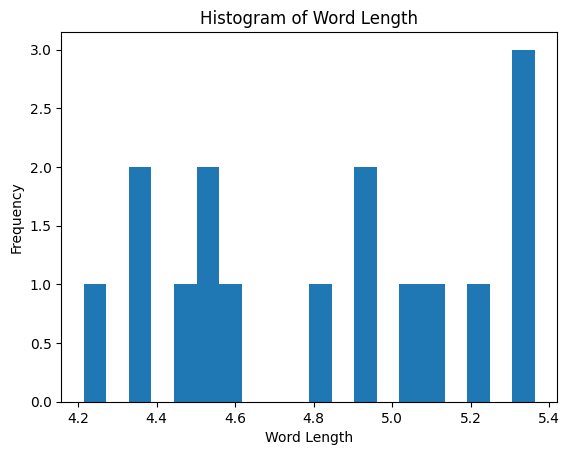

sentence length


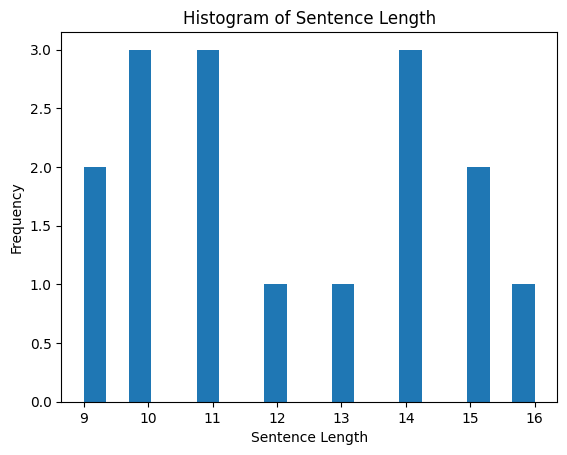

word frequency
low frequency words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd', "can't", 'larks']
control words:  ['spice', 'shepherd', 'shepherd', 'preached', 'pastor', 'corrupted', 'raged', 'swirled', 'pastor', 'lambs', 'thrived', 'vitality', 'bloom']


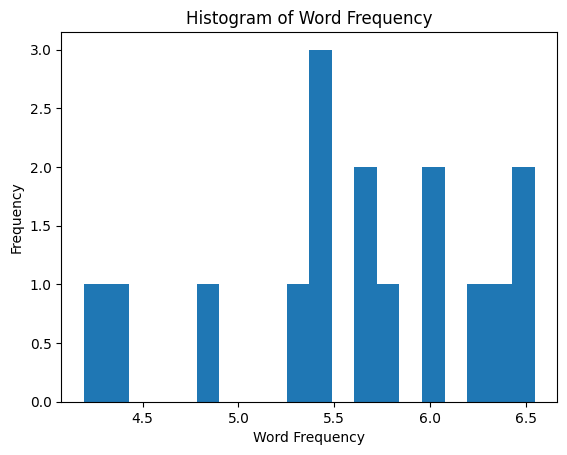

histograms ofD1
word length


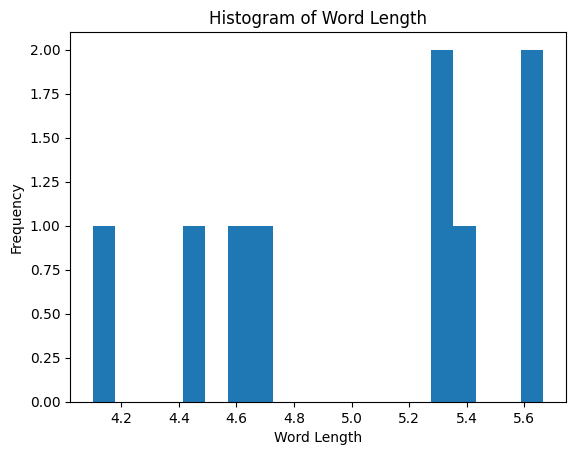

sentence length


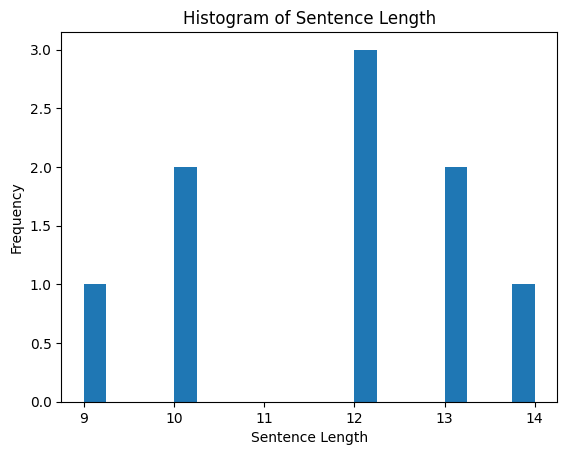

word frequency
low frequency words:  ["george's", 'cleans', 'john', "won't", 'alchemist']
control words:  ['mathematician', 'pastor', 'lambs', 'shepherd', 'confided']


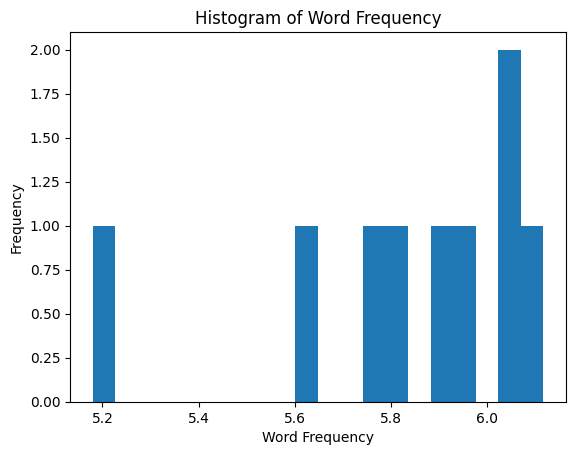

histograms ofD3
word length


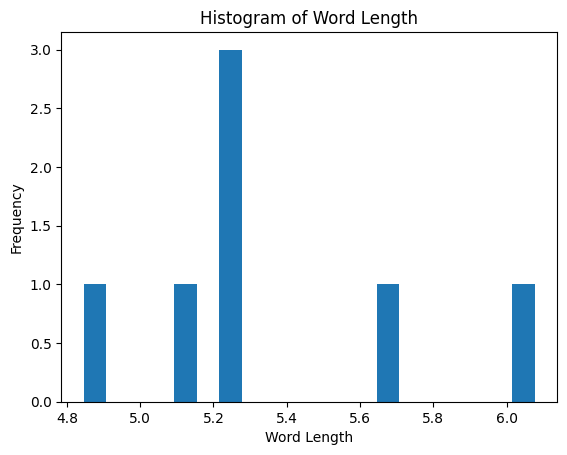

sentence length


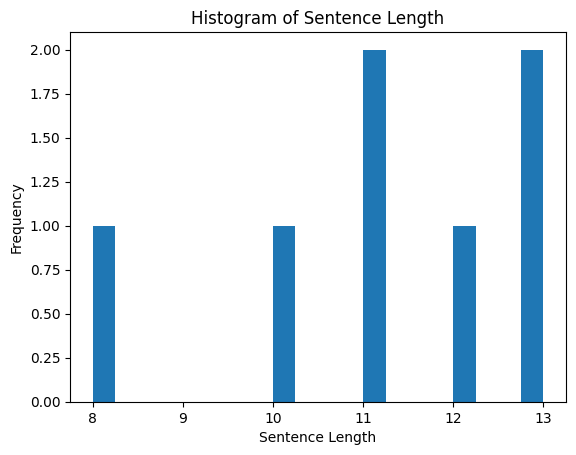

word frequency
low frequency words:  ['john', 'villager', 'george', 'george', 'george', 'john', "hasn't", 'george']
control words:  ['uprising', 'shepherd', 'figured']


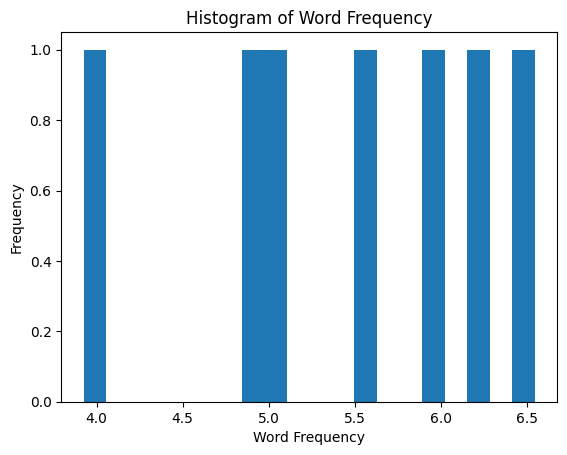

histograms ofD2
word length


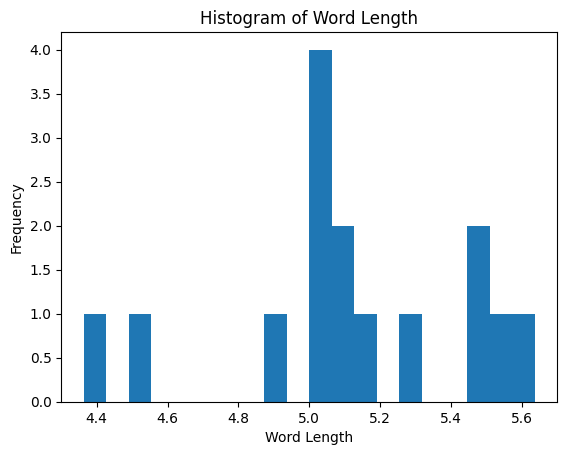

sentence length


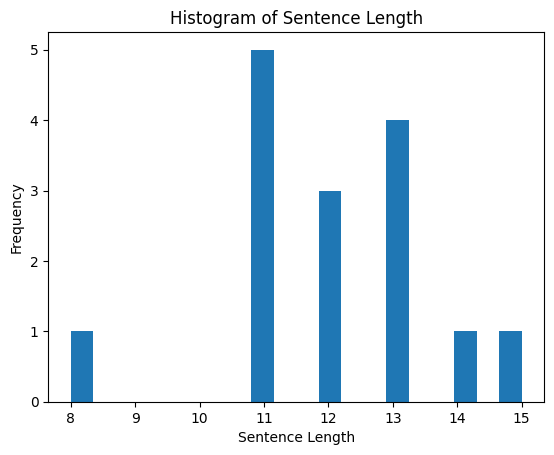

word frequency
low frequency words:  ['john', "wouldn't", 'partnered', "can't", "didn't", 'alchemist', 'dwells', 'ravens', "can't", 'alchemist', 'surmise', 'oracle', 'lusts', "george's", 'ravens', 'begger', 'forsee', "can't", 'astrologist', 'john']
control words:  ['witch', 'mathematicians', 'crumbling', 'pastor', 'haven', 'dreamt']


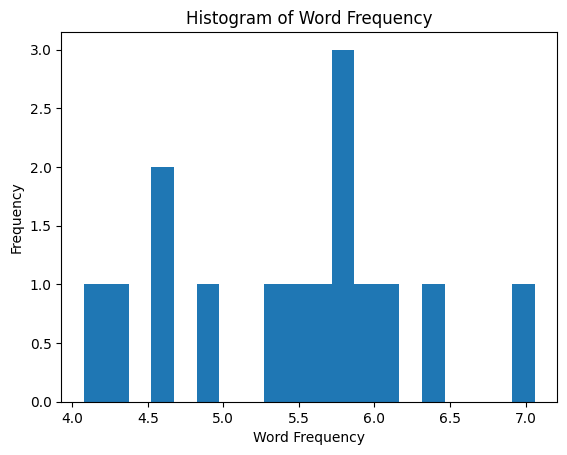

In [ ]:

stats_general(D_sorted16)
show_histograms(D_sorted4, num_bins=20)

0.01 words:  ['john', "wouldn't", "didn't", 'sheepdog', 'george', 'minstrel', 'ravens', "wouldn't", 'sheperd', "can't", 'larks']
1.5 words:  ['spice', 'shepherd', 'shepherd', 'preached', 'pastor', 'corrupted', 'raged', 'swirled', 'pastor', 'lambs', 'thrived', 'vitality', 'bloom']

0.01 words:  ["george's", 'cleans', 'john', "won't", 'alchemist']
1.5 words:  ['mathematician', 'pastor', 'lambs', 'shepherd', 'confided']

0.01 words:  ['john', 'villager', 'george', 'george', 'george', 'john', "hasn't", 'george']
1.5 words:  ['uprising', 'shepherd', 'figured']

0.01 words:  ['john', "wouldn't", 'partnered', "can't", "didn't", 'alchemist', 'dwells', 'ravens', "can't", 'alchemist', 'surmise', 'oracle', 'lusts', "george's", 'ravens', 'begger', 'forsee', "can't", 'astrologist', 'john']
1.5 words:  ['witch', 'mathematicians', 'crumbling', 'pastor', 'haven', 'dreamt']


In [ ]:
#check for low frequency word



In [ ]:
import pandas as pd
index=[]
Vdep=[]
Pdep=[]
ellip=[]
p_strand=[]
prep=[]
wh=[]
sentence=[]
v_test=[]
p_test=[]

for D in D_sorted16:
  for key in D.keys():
    stim=Dict[key[:-1]]
    index.append(stim.index())
    if stim.dependency==0:
      Vdep.append(0)
      Pdep.append(0)
    elif stim.dependency==1:
      Vdep.append(1)
      Pdep.append(0)
    elif stim.dependency==3:
      Vdep.append(0)
      Pdep.append(1)
    elif stim.dependency==2:
      Vdep.append(1)
      Pdep.append(1)

    if key[-1]=='a':
      ellip.append(1)
      p_strand.append(0)
    elif key[-1]=='b':
      ellip.append(1)
      p_strand.append(1)
    elif key[-1]=='c':
      ellip.append(0)
      p_strand.append(0)
    elif key[-1]=='d':
      ellip.append(0)
      p_strand.append(1)

    prep.append(stim.P)
    wh.append(stim.wh_phrase)
    sentence.append(D[key])
    v_test.append(stim.v_test())
    p_test.append(stim.p_test())



data={'Vdep': Vdep,
   'Pdep': Pdep,
   'ellipsis': ellip,
   'P-strand': p_strand,
   'P': prep,
   'wh': wh,
   'sentence': sentence,
   'V test': v_test,
   'P test': p_test
   }
df=pd.DataFrame(data, index=index)


In [ ]:
df.to_excel('stimuli.xlsx')

In [ ]:
#norming studies sheet
v1_test=[]
v2_test=[]

v1_s=[]
v2_s=[]

c=0
for d in D_sorted4:
  c+=1
  if c==1 or c==4:
    num_items=16
  else:
    num_items=8
  ct=1
  for stim in d.keys():
    if ct<=num_items/2:
      v1_test.append((Dict[stim]).p_test())
      v1_s.append((Dict[stim]).norm())

      v2_test.append((Dict[stim]).v_test())
      v2_s.append((Dict[stim]).norm())
    else:
      v1_test.append((Dict[stim]).v_test())
      v1_s.append((Dict[stim]).norm())

      v2_test.append((Dict[stim]).p_test())
      v2_s.append((Dict[stim]).norm())
    ct+=1

data_v1={'test':v1_test, 'norm':v1_s}
data_v2={'test':v2_test, 'norm':v2_s}

df_v1=pd.DataFrame(data_v1)
df_v2=pd.DataFrame(data_v2)

df_v1.to_excel('v1.xlsx')
df_v2.to_excel('v2.xlsx')
